In [500]:
!pip install requests

In [487]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [488]:
end_of_year = pd.date_range(start='2007-01-01', end='2023-12-01', freq='Y')

In [489]:
last_workday = []

for date in end_of_year:

    if date.day_name() == "Saturday":
        workday = date - pd.DateOffset(days=1)
    elif date.day_name() == "Sunday":
        workday = date - pd.DateOffset(days=2)
    else:
        workday = date
    
    last_workday.append(str(workday.strftime('%Y-%m-%d')))

In [ ]:
lista_dfs_moedas = []

for date in last_workday:

    url_base = f'https://olinda.bcb.gov.br/olinda/servico/mecir_dinheiro_em_circulacao/versao/v1/odata/informacoes_diarias?$top=100&$filter=Data%20eq%20{date}&$format=json'

    response = requests.get(url_base)

    json_moedas = response.json()

    df_moedas = pd.DataFrame(json_moedas['value'])
    
    lista_dfs_moedas.append(df_moedas)

base_completa = pd.concat(lista_dfs_moedas)
base_completa

In [491]:
#Criando novas colunas
base_completa['Ano'] = base_completa['Data'].str.slice(0,4)

In [ ]:
base_completa

In [493]:
params = {
    'ytick.color' : 'k',
    'xtick.color' : 'k',
    'axes.edgecolor' : 'k',
    'axes.labelcolor' : 'k',
}

plt.rcParams.update(params)
plt.rcParams.update({'font.size': 8})

In [494]:
base_cedulas = base_completa[base_completa['Especie'] == 'Cédulas']
base_moedas = base_completa[base_completa['Especie'] == 'Moedas']

In [ ]:
base_cedulas['Valor - blhões R$'] = base_cedulas['Valor']/1000000000

base_cedulas = pd.pivot_table(base_cedulas, index="Ano", columns="Denominacao", values="Valor - blhões R$")
base_cedulas = base_cedulas[['1.00', '2.00','5.00', '10.00', '20.00', '50.00', '100.00', '200.00']]
base_cedulas

<Axes: title={'center': 'Cédulas em circulação (bilhões R$)'}, xlabel='Denominação da cédula', ylabel='Ano'>

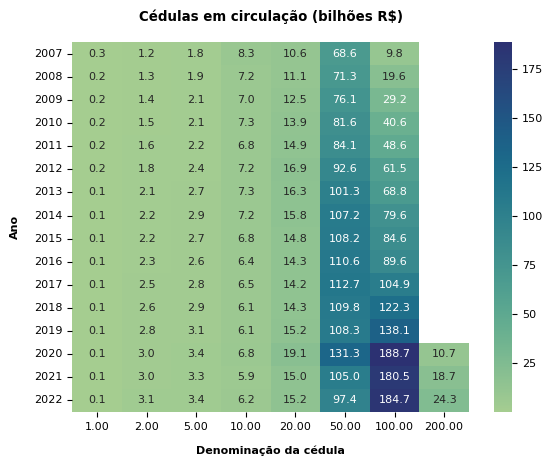

In [496]:

ax = sns.heatmap(base_cedulas, annot = True, fmt='.1f', cmap="crest")

ax.set_ylabel("Ano", labelpad = 10, weight = 'bold')
ax.set_xlabel('Denominação da cédula', labelpad = 10, weight = 'bold')
ax.set_title('Cédulas em circulação (bilhões R$)', weight = 'bold', pad = 15)

ax

In [ ]:
base_moedas['Valor - milhões R$'] = base_moedas['Valor']/1000000

base_moedas = pd.pivot_table(base_moedas, index="Ano", columns="Denominacao", values="Valor - milhões R$")
base_moedas = base_moedas[['0.01', '0.05','0.10', '0.25', '0.50', '1.00']]
base_moedas

<Axes: title={'center': 'Moedas em circulação (milhões R$)'}, xlabel='Denominação da moeda', ylabel='Ano'>

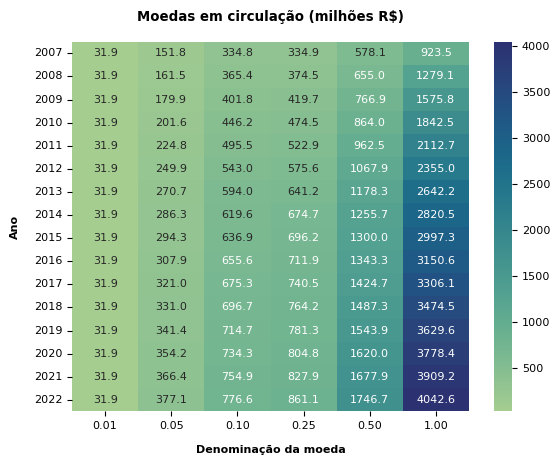

In [499]:

ax = sns.heatmap(base_moedas, annot = True, fmt='.1f', cmap="crest")

ax.set_ylabel("Ano", labelpad = 10, weight = 'bold')
ax.set_xlabel('Denominação da moeda', labelpad = 10, weight = 'bold')
ax.set_title('Moedas em circulação (milhões R$)', weight = 'bold', pad = 15)

ax